To extend on my [post about plotting and reshaping data](http://www.datasciencebytes.com/bytes/2014/12/20/cleaning-reshaping-and-plotting-bart-time-series-data-with-pandas/) from the [BART API](http://www.bart.gov/schedules/developers/api), I worked a bit with the matplotlib annotion interface to add text and arrows to a plot. The meat of this post is in cell #4 below. [Download notebook](https://github.com/frankcleary/data-science-bytes/blob/master/content/bart-annotate.ipynb).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

def prettify_axis(ax, ylabel='', xlabel=''):
    label_format_dict = dict(fontsize=20, fontweight='bold')
    tick_format_dict = dict(labelsize=16, direction='out', top='off', right='off', 
                            length=4, width=1)
    ax.set_xlabel(xlabel, label_format_dict)
    ax.set_ylabel(ylabel, label_format_dict)
    ax.tick_params(**tick_format_dict)

The file [`mill_pivot.csv`](/data/mill_pivot.csv) contains the estimated time until departure for Millbrae bound BART trains leaving the El Cerrito Plaza, as described in a [previous post](http://www.datasciencebytes.com/bytes/2014/12/20/cleaning-reshaping-and-plotting-bart-time-series-data-with-pandas/). Each row is a minute of the day and each column is a specific day.

In [2]:
def time_parser(time_string, string_format='%H:%M:%S'):
     return datetime.datetime.strptime(time_string, string_format).time()
mill_pivot = pd.read_csv('data/mill_pivot.csv', 
                         converters={'time_of_day': time_parser},
                         index_col=0)
mill_pivot.ix[:3, :4]

,2014-11-28,2014-12-01,2014-12-02,2014-12-03
time_of_day,,,,
03:29:00,52,52,52,52
03:30:00,51,51,51,51
03:31:00,50,50,50,50


In [3]:
PLOT_ARGS = dict(figsize=(10, 8), cmap='Paired', lw=2, alpha=.5, ylim=[0, 40],
                 xlim=[datetime.time(5, 0), datetime.time(18, 0)])
X_TICKS = [datetime.time(hour, minute) 
           for minute in xrange(0, 60, 20) 
           for hour in xrange(5, 18)]
def emphasize_date(pivot_table, date, plot_args=PLOT_ARGS, xticks=X_TICKS):
    ax = pivot_table.plot(**plot_args)
    prettify_axis(ax, xlabel='Time of Day', ylabel='ETD of next train (minutes)')
    ax.set_title(date, fontsize=24)
    for lines in zip(ax.get_lines(), ax.get_legend().get_lines()):
        if lines[0].get_label() == str(date):
            plt.setp(lines, lw=2, zorder=10, alpha=1, color='r')
        else:
            plt.setp(lines, alpha=.5)
    plt.xticks(xticks, rotation=90)
    return ax

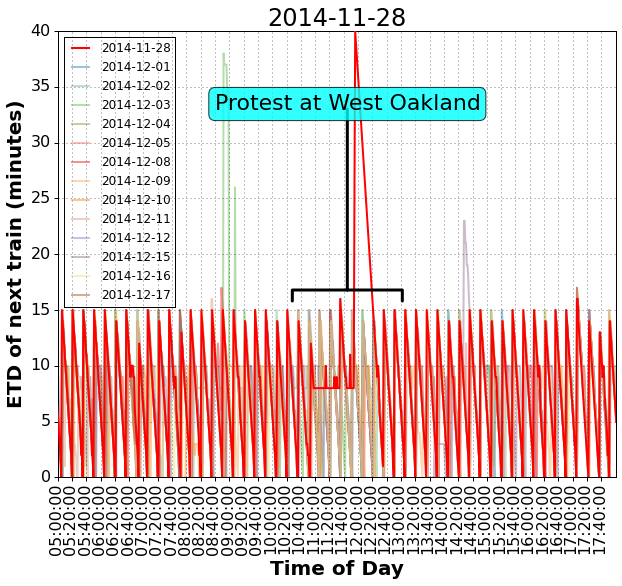

In [4]:
ax = emphasize_date(mill_pivot, datetime.date(2014, 11, 28))
ax.annotate('Protest at West Oakland', xy=('11:45', 15), xycoords='data', 
            xytext=(0, 200), textcoords='offset points', size=22,
            ha='center', 
            zorder=20, 
            bbox=dict(boxstyle='round', 
                      fc='cyan', 
                      alpha=.8),
            arrowprops=dict(arrowstyle="-[, widthB=2.5, lengthB=0.5", 
                            shrinkA=5, 
                            shrinkB=20, 
                            lw=3));